## Project Description - Bank Churn Prediction
<font color="red">Submitted By: Mayur Makadia</font>

**Github: https://github.com/mayurmakadia1/UTAustin-PGP-AIML/tree/master/4-Neural-Networks/**


#### Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

#### Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Dataset Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
##### Data Dictionary:
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 


### 1. Read the dataset

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("bank.csv")  

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#check for duplicated rows if any
df[df.duplicated()==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### 2. Drop the columns which are unique for all users like IDs

In [7]:
#drop unique value columns
df  = df.drop("RowNumber" , axis=1)
df  = df.drop("CustomerId" , axis=1)
df  = df.drop("Surname" , axis=1)

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###  3. Bivariate analysis and data insights

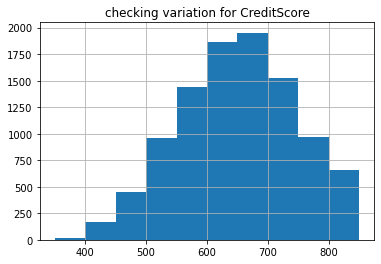

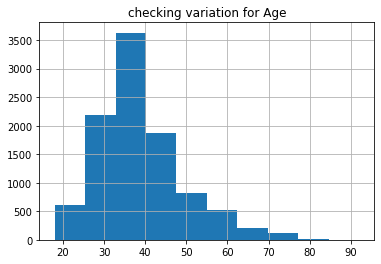

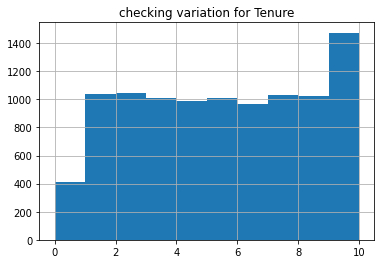

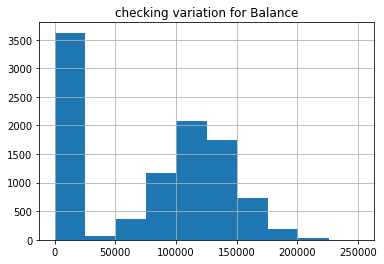

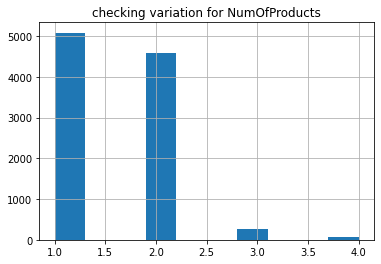

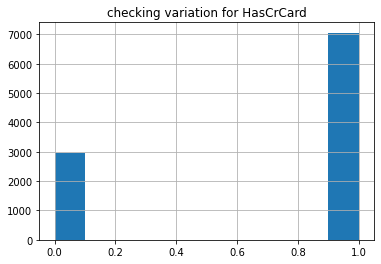

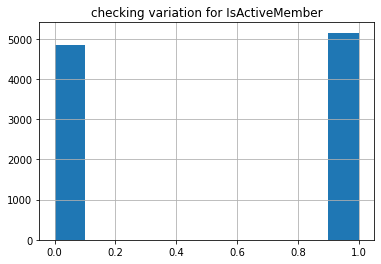

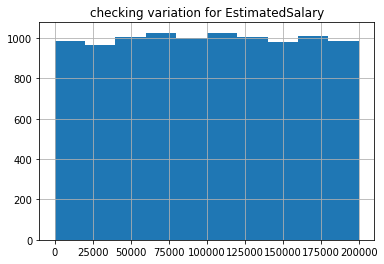

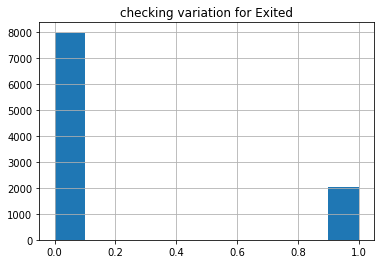

In [9]:
for g in df.select_dtypes(include=['float64','int64']).columns:
    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1=df[g].hist(ax=axes)
    f1.title.set_text("checking variation for {}".format(g))

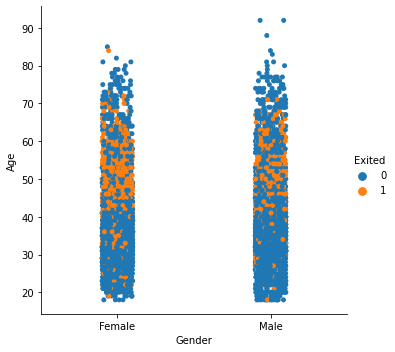

In [10]:
g = sns.catplot(x="Gender", y="Age", hue="Exited", data=df)

- There seem little more female customers who exited the bank in lower age rance from 20 to 40 than male customers 

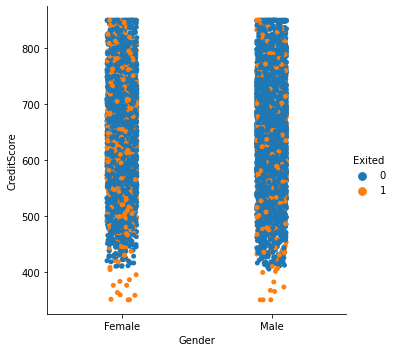

In [11]:
g = sns.catplot(x="Gender", y="CreditScore", hue="Exited", data=df)

- Female customers with lower credit score seems to have exited the bank more than the male customers with lower credit score
- Even in the higher credit score range there seem to be more female customers who have exited the bank

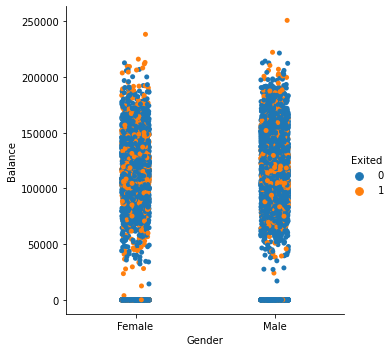

In [12]:
g = sns.catplot(x="Gender", y="Balance", hue="Exited", data=df)

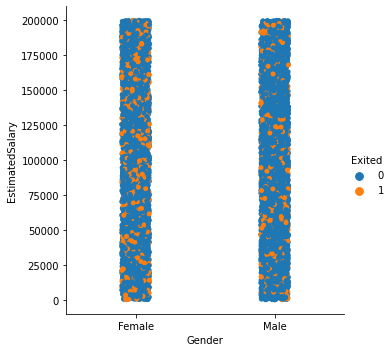

In [13]:
g = sns.catplot(x="Gender", y="EstimatedSalary", hue="Exited", data=df)

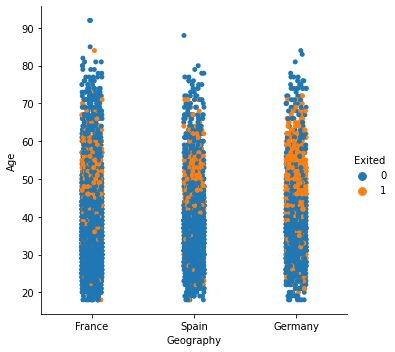

In [14]:
g = sns.catplot(x="Geography", y="Age", hue="Exited", data=df)

- Germany seems to have more customers in age range of 40 to 60 years in age who have exited than Spain and France

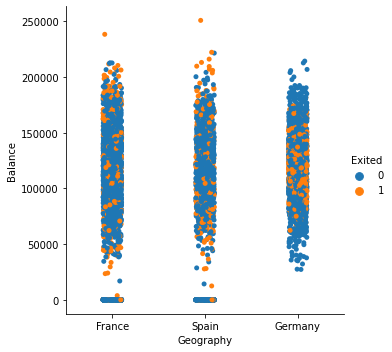

In [15]:
g = sns.catplot(x="Geography", y="Balance", hue="Exited", data=df)

- Germany seems to have customers in balance between 100000 and 150000 who have exited compared to Spain and France who have customers exited in lower and higher balance range

In [16]:
# convert the categorical values using one-hot encoding
df = pd.get_dummies(df, columns=['Geography'],drop_first=True)

In [17]:
# convert the categorical values using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)

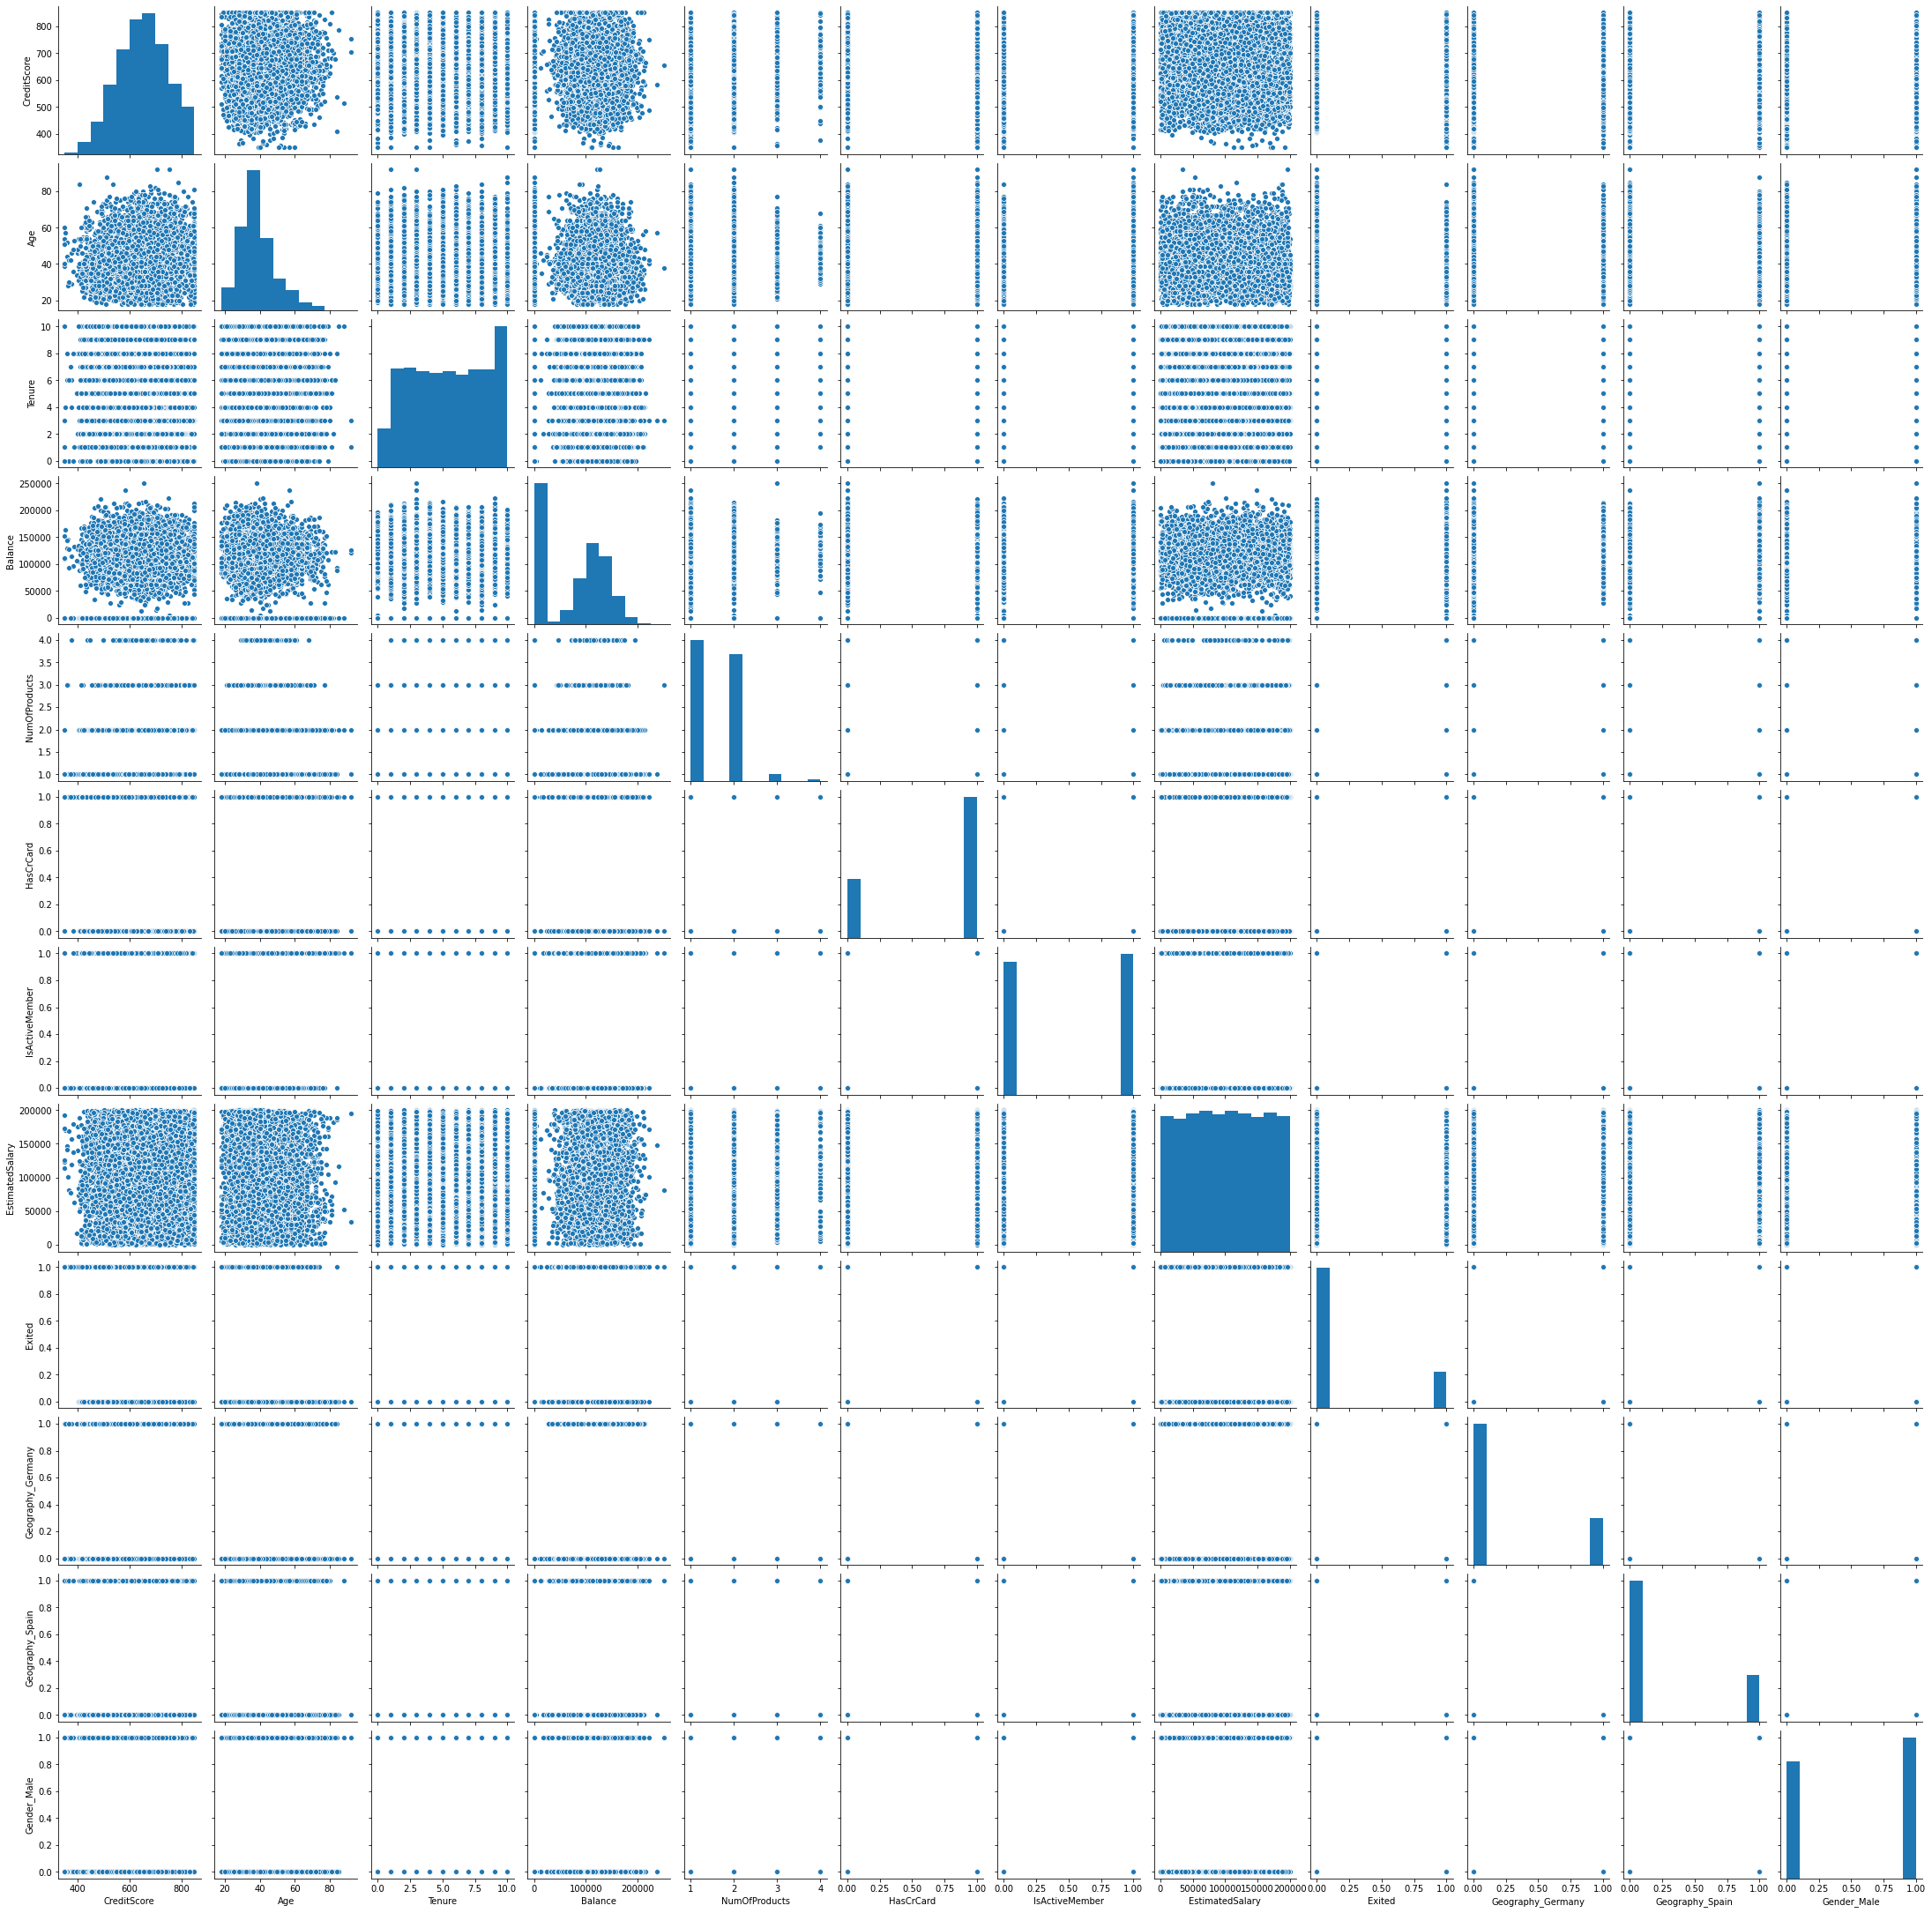

In [18]:
sns.pairplot(df)

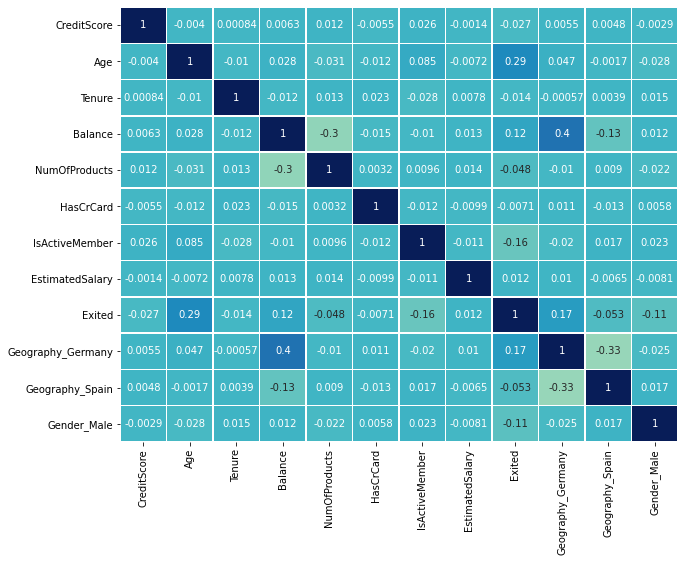

In [19]:
#correlation matrix
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### 4. Distinguish the feature and target set and divide the data set into training and test sets

In [20]:
#Define X (feature set) and Y (target) variables
X_data = df.loc[:, df.columns != 'Exited']  # independent variables
y_data = df.loc[:, df.columns == 'Exited']  # Target variable

In [21]:
X_data.shape,y_data.shape

((10000, 11), (10000, 1))

In [22]:
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

In [24]:
print("Exited = 1===="+str(y_train[y_train['Exited'] == 1].count()))
print("Exited = 0===="+str(y_train[y_train['Exited'] == 0].count()))

Exited = 1====Exited    1432
dtype: int64
Exited = 0====Exited    5568
dtype: int64


#### Data is imbalanced as customer who left (exited) the bank is just 25% of the customers who did not. Hence use oversampling to improve the accuracy of the training dataset

In [25]:
#oversampling for customers who exited the bank
y_1label = y_train[y_train['Exited'] == 1]
y_1label_index = y_train[y_train['Exited'] == 1].index
x_label1 = X_train.loc[y_1label_index]

In [26]:
x_label0= x_label1
x_label0= x_label0.append(x_label1)
#x_label0= x_label0.append(x_label1)

y_0label= y_1label
y_0label= y_0label.append(y_1label)
#y_0label= y_0label.append(y_1label)

x_label0.shape,y_0label.shape

((2864, 11), (2864, 1))

In [27]:
X_train = X_train.append(x_label0)
y_train = y_train.append(y_0label)

In [28]:
print("Exited = 1===="+str(y_train[y_train['Exited'] == 1].count()))
print("Exited = 0===="+str(y_train[y_train['Exited'] == 0].count()))

Exited = 1====Exited    4296
dtype: int64
Exited = 0====Exited    5568
dtype: int64


#### After performing oversampling, customers who left (exited) the bank is 77% of the customers who did not. Training data after oversampling is now balanced.

### 5. Normalize the train and test data

In [29]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler()

# Scale the train set
X_train = scaler.fit_transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 11)
(3000, 11)
(9864, 1)
(3000, 1)


### 6. Initialize & build the model

In [31]:
#create model with Sequential class
model = Sequential()

In [32]:
#adding input, hidden layers and output layer with activation
model.add(Dense(11, input_shape = (11,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

##### Model Optimization

In [33]:
#add model optimizer
sgd = optimizers.Adam(lr = 0.1)

##### Model Compliation - use Threshold of 0.5

In [34]:
#compile the model before training - use threshold of 0.5
model.compile(optimizer = sgd, loss = 'binary_crossentropy', 
              metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

##### Model Summary

In [36]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 198
Trainable params: 198
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [37]:
#set batch and epochs
btch = 50
epch = 10

In [38]:
#training the model
model.fit(X_train, y_train.values, batch_size = btch, epochs = epch, validation_split = 0.2, verbose = 1)

Train on 7891 samples, validate on 1973 samples
Epoch 1/10
7891/7891 [==============================] - 1s 112us/sample - loss: 0.4937 - binary_accuracy: 0.7481 - val_loss: 0.9977 - val_binary_accuracy: 0.5743
Epoch 2/10
7891/7891 [==============================] - 0s 24us/sample - loss: 0.4500 - binary_accuracy: 0.7944 - val_loss: 0.7288 - val_binary_accuracy: 0.7420
Epoch 3/10
7891/7891 [==============================] - 0s 23us/sample - loss: 0.4510 - binary_accuracy: 0.7862 - val_loss: 0.8528 - val_binary_accuracy: 0.6756
Epoch 4/10
7891/7891 [==============================] - 0s 23us/sample - loss: 0.4531 - binary_accuracy: 0.7931 - val_loss: 0.9480 - val_binary_accuracy: 0.6422
Epoch 5/10
7891/7891 [==============================] - 0s 23us/sample - loss: 0.4471 - binary_accuracy: 0.7962 - val_loss: 1.0073 - val_binary_accuracy: 0.4050
Epoch 6/10
7891/7891 [==============================] - 0s 24us/sample - loss: 0.4478 - binary_accuracy: 0.8062 - val_loss: 1.3277 - val_binary_ac

#### Model Evaluation

In [39]:
#evaluate the model
results = model.evaluate(X_test, y_test.values)

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [40]:
print(model.metrics_names)
print(results)    

['loss', 'binary_accuracy']
[0.40992761913935344, 0.80866665]


### 7. Predict the results

In [41]:
Y_pred_cls = model.predict_classes(X_test, batch_size=btch, verbose=0)

### 8. Print the Accuracy score and confusion matrix

In [42]:
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1 (Dropout): 0.80866665
Recall_score: 0.6347107438016529
Precision_score: 0.5210312075983717
F-score: 0.5722801788375559


In [44]:
confusion_matrix(y_test.values, Y_pred_cls)

array([[2042,  353],
       [ 221,  384]], dtype=int64)

METRICS RELATED TO MODEL PERFORMANCE
Confusion Matrix


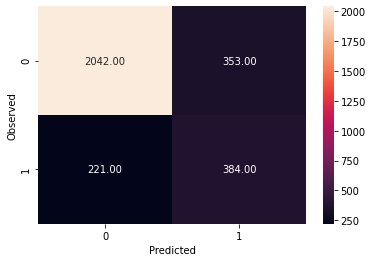

None

Recall: 0.6347107438016529

Precision: 0.5210312075983717

F1 Score: 0.5722801788375559


In [45]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
print("===============================================================") 
print("METRICS RELATED TO MODEL PERFORMANCE") 
print("===============================================================") 
print('Confusion Matrix')
print(draw_cm(y_test.values,Y_pred_cls))
print()
print("Recall:",recall_score(y_test.values,Y_pred_cls))
print()
print("Precision:",precision_score(y_test.values,Y_pred_cls))
print()
print("F1 Score:",f1_score(y_test.values,Y_pred_cls))

### Tuning model with increased number of neurons, batch and epochs

In [90]:
#create model with Sequential class
model = Sequential()

In [91]:
#adding input, hidden layers and output layer with activation
#output layer activiation is sigmoid because this is a classification problem
#increased number of neurons seemed to have increased the accuracy from around 80 to 86 with 50 neurons
model.add(Dense(50, input_shape = (11,), activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [92]:
#add model optimizer
sgd = optimizers.Adam(lr = 0.1)

In [93]:
#compile the model before training - use threshold of 0.5
model.compile(optimizer = sgd, loss = 'binary_crossentropy', 
              metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

In [94]:
#summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


In [95]:
#set batch and epochs
btch = 300
epch = 20

In [96]:
#training the model
model.fit(X_train, y_train.values, batch_size = btch, epochs = epch, validation_split = 0.2, verbose = 1)

Train on 7891 samples, validate on 1973 samples
Epoch 1/20
7891/7891 [==============================] - 0s 45us/sample - loss: 0.5907 - binary_accuracy: 0.7235 - val_loss: 0.8624 - val_binary_accuracy: 0.3441
Epoch 2/20
7891/7891 [==============================] - 0s 7us/sample - loss: 0.4745 - binary_accuracy: 0.7645 - val_loss: 0.8782 - val_binary_accuracy: 0.3654
Epoch 3/20
7891/7891 [==============================] - 0s 6us/sample - loss: 0.4254 - binary_accuracy: 0.8021 - val_loss: 0.9337 - val_binary_accuracy: 0.4551
Epoch 4/20
7891/7891 [==============================] - 0s 6us/sample - loss: 0.4153 - binary_accuracy: 0.8133 - val_loss: 0.6649 - val_binary_accuracy: 0.5428
Epoch 5/20
7891/7891 [==============================] - 0s 7us/sample - loss: 0.4063 - binary_accuracy: 0.8214 - val_loss: 0.8665 - val_binary_accuracy: 0.5104
Epoch 6/20
7891/7891 [==============================] - 0s 7us/sample - loss: 0.3965 - binary_accuracy: 0.8217 - val_loss: 0.8010 - val_binary_accuracy

In [97]:
#evaluate the model
results = model.evaluate(X_test, y_test.values)

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [98]:
print(model.metrics_names)
print(results)    

['loss', 'binary_accuracy']
[0.3620447657505671, 0.86]


In [99]:
Y_pred_cls = model.predict_classes(X_test, batch_size=btch, verbose=0)

In [100]:
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1 (Dropout): 0.86
Recall_score: 0.4644628099173554
Precision_score: 0.7453580901856764
F-score: 0.5723014256619146


In [101]:
confusion_matrix(y_test.values, Y_pred_cls)

array([[2299,   96],
       [ 324,  281]], dtype=int64)

METRICS RELATED TO MODEL PERFORMANCE
Confusion Matrix


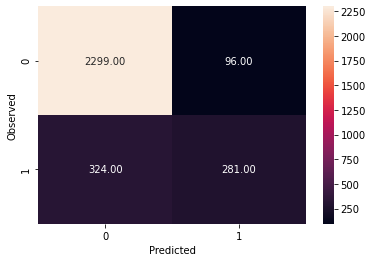

None

Recall: 0.4644628099173554

Precision: 0.7453580901856764

F1 Score: 0.5723014256619146


In [102]:
print("===============================================================") 
print("METRICS RELATED TO MODEL PERFORMANCE") 
print("===============================================================") 
print('Confusion Matrix')
print(draw_cm(y_test.values,Y_pred_cls))
print()
print("Recall:",recall_score(y_test.values,Y_pred_cls))
print()
print("Precision:",precision_score(y_test.values,Y_pred_cls))
print()
print("F1 Score:",f1_score(y_test.values,Y_pred_cls))

#### After model tuning the accuracy increased from 80% to 86% and Recall decreased from 63% to 46%.